In [1]:
import numpy as np
import scipy as sp
from scipy import optimize,special,integrate,stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import copy

from lanczos_bin import *

from IPython.display import clear_output
%load_ext autoreload
%autoreload 2

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
lam = sp.stats.beta.ppf(np.linspace(0,1,1000),1,10)
A_mat = lam

n = len(A_mat)
b_vec = np.ones(n,dtype=np.double)
b_vec /= np.linalg.norm(b_vec)

f = lambda x: (x>=0)
fAb = f(A_mat)*b_vec
    
K = 100
Q,(a_,b_) = exact_lanczos(A_mat,b_vec,K,reorth=True)

i = 10

shifts = np.linspace(-.1,.5,1000)

spec_OR = np.zeros_like(shifts)
spec_FA = np.zeros_like(shifts)
spec_HA = np.zeros_like(shifts)

for j,c in enumerate(shifts):


    T = np.diag(a_[:i]-c) + np.diag(b_[:i-1],1) + np.diag(b_[:i-1],-1)
    theta,S = sp.linalg.eigh(T)
    
    spec_FA[j] = S[0]@((theta)/np.sqrt((theta)**2)*S[0])

    TT_ = T@T 
    TT_[-1,-1] += b_[i-1]**2
    theta,S = sp.linalg.eigh(TT_)

    spec_OR[j] = (S[0]@((1/np.sqrt(theta))*(S.T@T[0])))

    
    ek1 = np.zeros(i)
    ek1[-1] = 1
    e0 = np.zeros(i)
    e0[0] = 1
    
    z = b_[i-1]**2*np.linalg.solve(T,ek1)
    T_ = np.copy(T)
    T_[:,-1] += z
    theta,S = sp.linalg.eig(T_)
    theta = np.real(theta)
    spec_HA[j] = S[0]@((theta)/np.sqrt((theta)**2)*np.linalg.solve(S,e0))
    


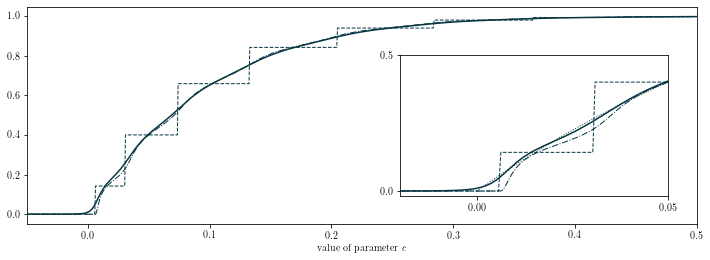

In [4]:
fig,axs = plt.subplots(1,1,figsize=(12,4),sharey=False,)

axs = [axs]
axs[0].plot(shifts,(1-spec_OR)/2,color='#073642',ls='-')
axs[0].plot(shifts,(1-spec_FA)/2,color='#073642',ls='--',lw=1,)
axs[0].plot(shifts,(1-spec_HA)/2,color='#073642',ls='-.',lw=1,)
#plt.plot(lam,np.arange(len(lam))/len(lam))

axs[0].set_xlim(-.05,.5)
axs[0].set_yticks([0,.2,.4,.6,.8,1])
axs[0].set_xlabel('value of parameter $c$')


axins = inset_axes(axs[0], "100%","100%", loc='upper left', bbox_to_anchor=(0.55,.15,.4,.65), bbox_transform=axs[0].transAxes) # zoom = 6
axins.plot(shifts,(1-spec_OR)/2,color='#073642',ls='-')
axins.plot(shifts,(1-spec_FA)/2,color='#073642',ls='--',lw=1,)
axins.plot(shifts,(1-spec_HA)/2,color='#073642',ls='-.',lw=1,)
axins.plot(np.linspace(.0,.05,100),sp.stats.beta.cdf(np.linspace(.0,.05,100),1,10),color='#073642',lw=1,ls=':')

# sub region of the original image
x1, x2, y1, y2 = -.02,.05,-.02,.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([0,x2])
axins.set_yticks([0,y2])


plt.savefig('imgs/spec_approx.pdf',bbox_inches='tight')